# Simple Neural Network Model 

Using composite indicator as an input and optimal max-shape portfolio for the next period as an output

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import os
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [3]:
data_provider = DataProvider()

df_countries, benchmark = data_provider.get_etf_data()
acwi_weights = data_provider.get_acwi_weights()

In [4]:
days_to_recalculate = data_provider.get_days_to_recalculate()

# Start after 1 year to have enough historic data for first calculated period
days_to_recalculate = days_to_recalculate.iloc[12:]
days_to_recalculate = pd.DatetimeIndex(days_to_recalculate)
days_to_recalculate

DatetimeIndex(['2000-01-04', '2000-02-04', '2000-03-06', '2000-04-04',
               '2000-05-04', '2000-06-06', '2000-07-05', '2000-08-04',
               '2000-09-06', '2000-10-04',
               ...
               '2023-03-03', '2023-04-06', '2023-05-04', '2023-06-06',
               '2023-07-06', '2023-08-03', '2023-09-06', '2023-10-05',
               '2023-11-03', '2023-12-05'],
              dtype='datetime64[ns]', name='Days to rebalance', length=288, freq=None)

In [5]:
x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_composite_indicator(
        date, periods=6)
    x.append(indicators.values)

x = np.array(x)
x.shape

(288, 6, 27)

In [6]:
os.chdir(os.path.expanduser('..'))

from PortfolioOptimizer import PortfolioOptimizer

In [7]:
y = []
for i in range(0,len(days_to_recalculate)):
    if i == len(days_to_recalculate) - 1:
        data_period = df_countries.loc[
            days_to_recalculate[i]:]
    else:
        data_period = df_countries.loc[
            days_to_recalculate[i]:days_to_recalculate[i+1]]
    i += 1

    year_str = str(data_period.index[0].year)
    acwi_weights_year = acwi_weights.loc[year_str]

    optimizer = PortfolioOptimizer()
    optimal_portfolio = optimizer.get_optimal_portfolio(
        data_period, acwi_weights_year)
    y.append(optimal_portfolio.values)

y = np.array(y)
y.shape

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


(288, 27)

## Splitting data into 70% test, 10% validation and 20% test

In [82]:
val_split = int(0.7 * x.shape[0])
test_split = int(0.8 * x.shape[0])

In [83]:
# Train
dates_for_training = days_to_recalculate[:val_split]
print(dates_for_training)

x_train = x[:val_split]
print(x_train.shape)
y_train = y[:val_split]
print(y_train.shape)

DatetimeIndex(['2000-01-04', '2000-02-04', '2000-03-06', '2000-04-04',
               '2000-05-04', '2000-06-06', '2000-07-05', '2000-08-04',
               '2000-09-06', '2000-10-04',
               ...
               '2015-12-03', '2016-01-06', '2016-02-03', '2016-03-03',
               '2016-04-06', '2016-05-05', '2016-06-03', '2016-07-06',
               '2016-08-03', '2016-09-07'],
              dtype='datetime64[ns]', name='Days to rebalance', length=201, freq=None)
(201, 6, 27)
(201, 27)


In [84]:
# Validation
dates_for_validation = days_to_recalculate[val_split:test_split]
print(dates_for_validation)

x_val = x[val_split:test_split]
print(x_val.shape)
y_val = y[val_split:test_split]
print(y_val.shape)

DatetimeIndex(['2016-10-05', '2016-11-03', '2016-12-06', '2017-01-11',
               '2017-02-03', '2017-03-03', '2017-04-06', '2017-05-05',
               '2017-06-06', '2017-07-06', '2017-08-03', '2017-09-06',
               '2017-10-06', '2017-11-03', '2017-12-05', '2018-01-04',
               '2018-02-06', '2018-03-06', '2018-04-06', '2018-05-04',
               '2018-06-05', '2018-07-06', '2018-08-03', '2018-09-05',
               '2018-10-04', '2018-11-06', '2018-12-06', '2019-01-10',
               '2019-02-08'],
              dtype='datetime64[ns]', name='Days to rebalance', freq=None)
(29, 6, 27)
(29, 27)


In [85]:
# Test
dates_for_test = days_to_recalculate[test_split:]
print(dates_for_test)

x_test = x[test_split:]
print(x_test.shape)
y_test = y[test_split:]
print(y_test.shape)

DatetimeIndex(['2019-03-05', '2019-04-04', '2019-05-07', '2019-06-05',
               '2019-07-05', '2019-08-06', '2019-09-04', '2019-10-04',
               '2019-11-05', '2019-12-04', '2020-01-09', '2020-02-05',
               '2020-03-04', '2020-04-03', '2020-05-06', '2020-06-03',
               '2020-07-07', '2020-08-05', '2020-09-03', '2020-10-07',
               '2020-11-04', '2020-12-03', '2021-01-06', '2021-02-03',
               '2021-03-03', '2021-04-08', '2021-05-05', '2021-06-03',
               '2021-07-07', '2021-08-04', '2021-09-03', '2021-10-06',
               '2021-11-03', '2021-12-03', '2022-01-11', '2022-02-08',
               '2022-03-04', '2022-04-06', '2022-05-06', '2022-06-07',
               '2022-07-06', '2022-08-03', '2022-09-07', '2022-10-06',
               '2022-11-03', '2022-12-06', '2023-01-09', '2023-02-03',
               '2023-03-03', '2023-04-06', '2023-05-04', '2023-06-06',
               '2023-07-06', '2023-08-03', '2023-09-06', '2023-10-05',
      

## Auxiliary functions

In [171]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout, GRU, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import L2

In [87]:
def show_loss(hd):
    epochs = range(1, len(hd['loss'])+1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title("Loss log")
    plt.legend()
    plt.show()

In [88]:
def train_and_evaluate_model(model, epochs=200, learning_rate=1e-3,
                             with_early_stopping=False):
    start_time = time.time()

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error')
    model.summary()
    print()

    callbacks = []
    if with_early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', 
                                       patience=100))

    callbacks.append(ReduceLROnPlateau(monitor='val_loss', 
                                       patience=50, min_lr=1e-6))
    
    hist = model.fit(x_train, y_train,
                     validation_data=(x_val, y_val),
                     epochs=epochs,
                     callbacks=callbacks)

    train_error = model.evaluate(x_train, y_train, verbose=0)
    print('Train error:', train_error)

    val_error = model.evaluate(x_val, y_val, verbose=0)
    print('Val error:', val_error)

    test_error = model.evaluate(x_test, y_test, verbose=0)
    print('Test error:', test_error)

    print('Execution time', round(time.time() - start_time, 2), 'seconds')

    show_loss(hist.history)

## Simple Dense Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_40 (Flatten)            │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8411 - val_loss: 2.6007 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5262 - val_loss: 2.3066 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2388 - val_loss: 2.0399 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9788 - val_loss: 1.7997 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7449 - val_loss: 1.5846 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5353 - val_loss: 1.3926 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3487 - val_loss: 1.2219 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1826 - val_loss: 1.0705 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0350 - val_loss: 0.9364 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

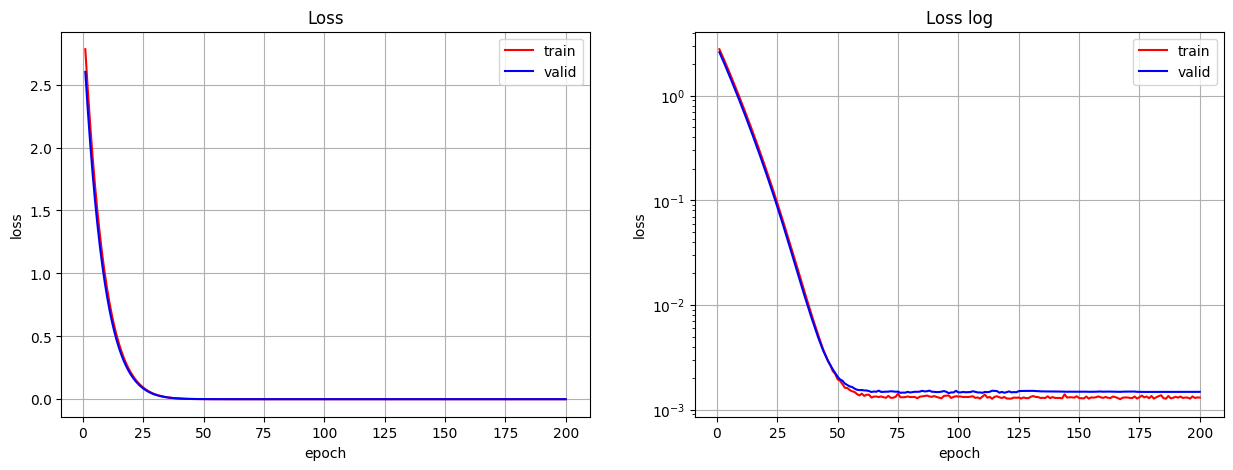

In [89]:
model_dnn = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn)

In [90]:
predictions = model_dnn.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [91]:
predictions[0].round(3)

array([0.378, 0.087, 0.087, 0.036, 0.03 , 0.036, 0.029, 0.027, 0.014,
       0.013, 0.015, 0.016, 0.015, 0.015, 0.017, 0.014, 0.014, 0.017,
       0.02 , 0.013, 0.017, 0.016, 0.016, 0.016, 0.015, 0.013, 0.015],
      dtype=float32)

In [92]:
y_test[0]

array([0.576, 0.033, 0.082, 0.016, 0.014, 0.013, 0.012, 0.011, 0.005,
       0.006, 0.03 , 0.003, 0.03 , 0.03 , 0.003, 0.002, 0.002, 0.001,
       0.017, 0.034, 0.03 , 0.009, 0.005, 0.002, 0.003, 0.03 , 0.001])

## Convolutional Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_94 (Conv1D)              │ (None, 4, 32)          │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_48 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147 (20.11 KB)

 Trainable params: 5,147 (20.11 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.1581 - val_loss: 7.5298 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3380 - val_loss: 6.7588 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5830 - val_loss: 6.0523 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8917 - val_loss: 5.4090 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2629 - val_loss: 4.8259 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6935 - val_loss: 4.2994 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1799 - val_loss: 3.8251 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7178 - val_loss: 3.3989 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3030 - val_loss: 3.0164 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

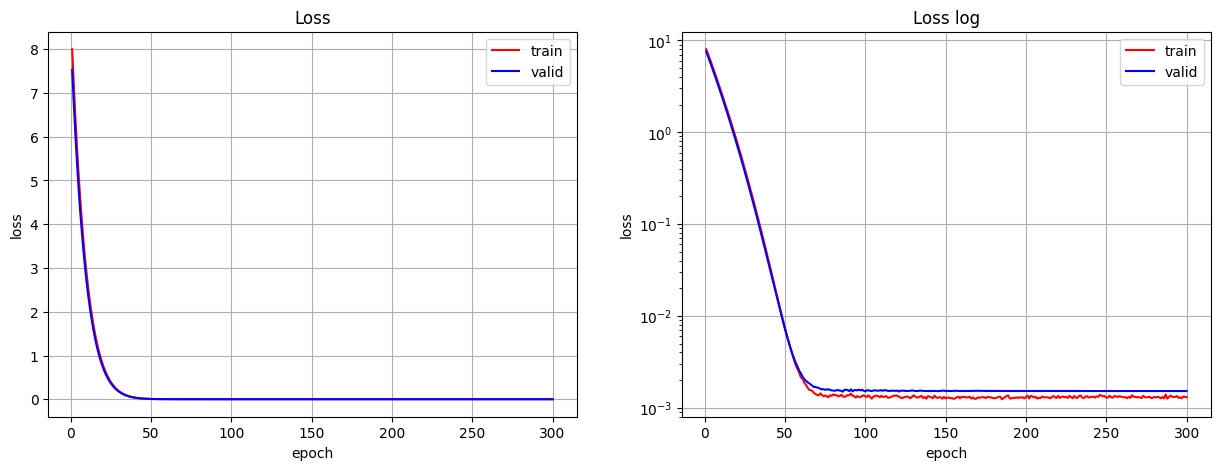

In [138]:
model_cnn = Sequential((
    Conv1D(32, 3, input_shape=x_train.shape[1:]),
    Flatten(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=L2(0.3)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_cnn, epochs=300)

## Model with GRU

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 32)             │         5,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,843 (26.73 KB)

 Trainable params: 6,843 (26.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.9197 - val_loss: 1.8333 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8049 - val_loss: 1.7226 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6956 - val_loss: 1.6175 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5916 - val_loss: 1.5179 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4934 - val_loss: 1.4239 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4005 - val_loss: 1.3350 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3124 - val_loss: 1.2509 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2295 - val_loss: 1.1714 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1521 - val_loss: 1.0969 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

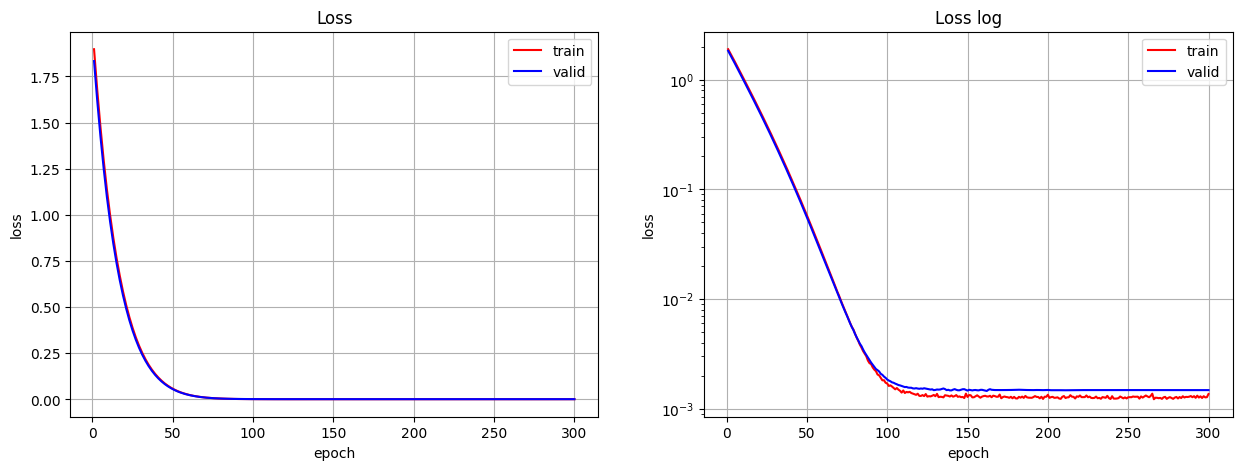

In [137]:
dropout = 0.1

model_gru = Sequential((
    GRU(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_gru, epochs=300)

## Model with LSTM

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,667 (33.86 KB)

 Trainable params: 8,667 (33.86 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.0691 - val_loss: 1.9776 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9472 - val_loss: 1.8600 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8312 - val_loss: 1.7481 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7208 - val_loss: 1.6420 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6158 - val_loss: 1.5416 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5170 - val_loss: 1.4467 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4232 - val_loss: 1.3570 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3349 - val_loss: 1.2723 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2514 - val_loss: 1.1923 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

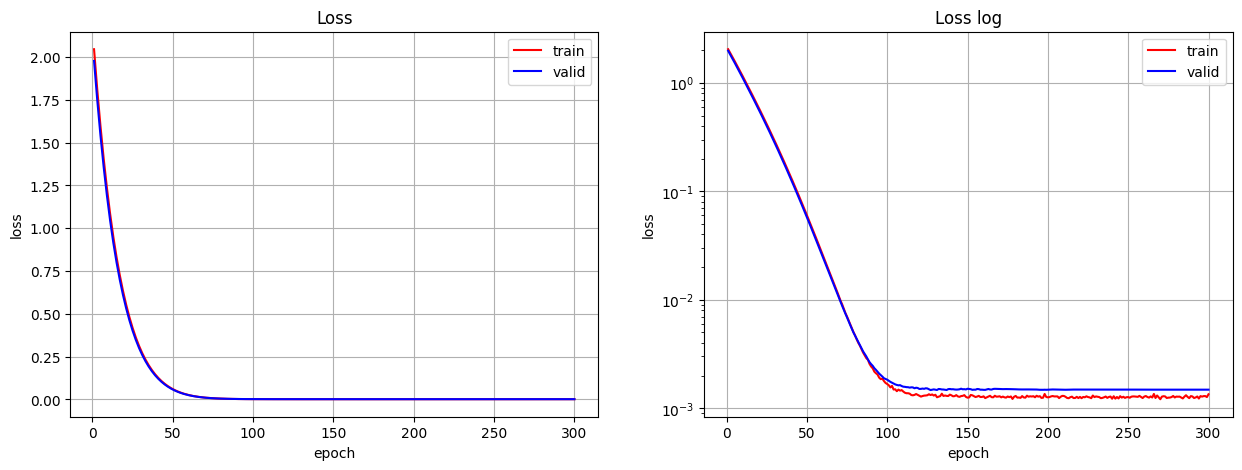

In [172]:
dropout = 0.1

model_lstm = Sequential((
    LSTM(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_lstm, epochs=300)

## Model Bidireccional

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 6, 32)          │         4,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 16)             │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,867 (30.73 KB)

 Trainable params: 7,867 (30.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.8720 - val_loss: 2.6106 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5305 - val_loss: 2.2931 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2206 - val_loss: 2.0074 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9423 - val_loss: 1.7523 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6943 - val_loss: 1.5258 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4745 - val_loss: 1.3257 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2799 - val_loss: 1.1495 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1094 - val_loss: 0.9948 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9596 - val_loss: 0.8591 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

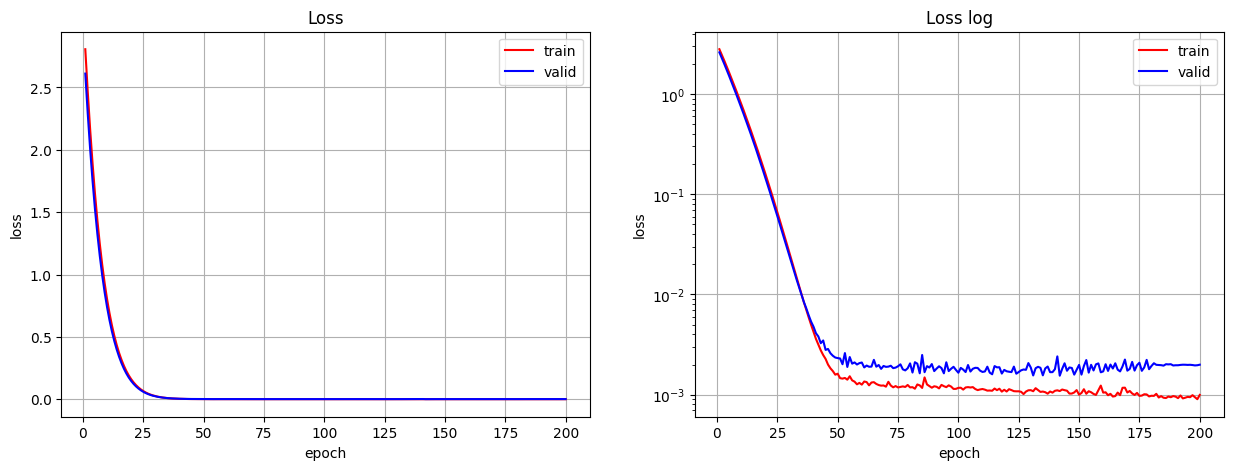

In [176]:
forward_layer = GRU(16, return_sequences=True)
backward_layer = GRU(16, activation='relu',
                     return_sequences=True,
                     go_backwards=True)

model_bidirectional = Sequential((
    Bidirectional(layer=forward_layer,
                  backward_layer=backward_layer,
                  input_shape=x_train.shape[1:]),
    Flatten(),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_bidirectional)

## Backtesting

In [139]:
benchmark_test = benchmark[dates_for_test[0]:]
benchmark_returns = np.log(benchmark_test).diff().dropna()
cum_benchmark_returns = (1 + benchmark_returns).cumprod() - 1
cum_benchmark_returns.loc[dates_for_test[0]] = 0
cum_benchmark_returns.sort_index(inplace=True)

In [161]:
days_to_rebalance = dates_for_test.insert(29, df_countries.index.values[-1])
df_prices_test = df_countries[dates_for_test[0]:]
df_returns_test = np.log(df_prices_test).diff().fillna(0)

In [141]:
def calculate_returns_for_model(model):
    predictions = model.predict(x_test)
    predictions_df = pd.DataFrame(predictions,
                                  index=dates_for_test,
                                  columns=df_countries.columns)
    predictions_df = predictions_df.reindex(index=df_prices_test.index)
    # Fill the entire month with predicted weights
    predictions_df = predictions_df.ffill()

    summed_returns = (df_returns_test.values *
                      predictions_df.values).sum(axis=1)
    total_returns = pd.Series(index=df_returns_test.index,
                              data=summed_returns)
    cum_total_returns = (1 + total_returns).cumprod() - 1
    cum_total_returns.loc[days_to_rebalance[0]] = 0
    cum_total_returns.sort_index(inplace=True)

    return total_returns, cum_total_returns

In [142]:
total_returns_model_dnn, cum_total_returns_model_dnn = calculate_returns_for_model(model_dnn)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [164]:
total_returns_model_cnn, cum_total_returns_model_cnn = calculate_returns_for_model(model_cnn)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [165]:
total_returns_model_gru, cum_total_returns_model_gru = calculate_returns_for_model(model_gru)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [177]:
total_returns_model_lstm, cum_total_returns_model_lstm = calculate_returns_for_model(model_lstm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [179]:
total_returns_model_bidirectional, cum_total_returns_model_bidirectional = calculate_returns_for_model(model_bidirectional)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


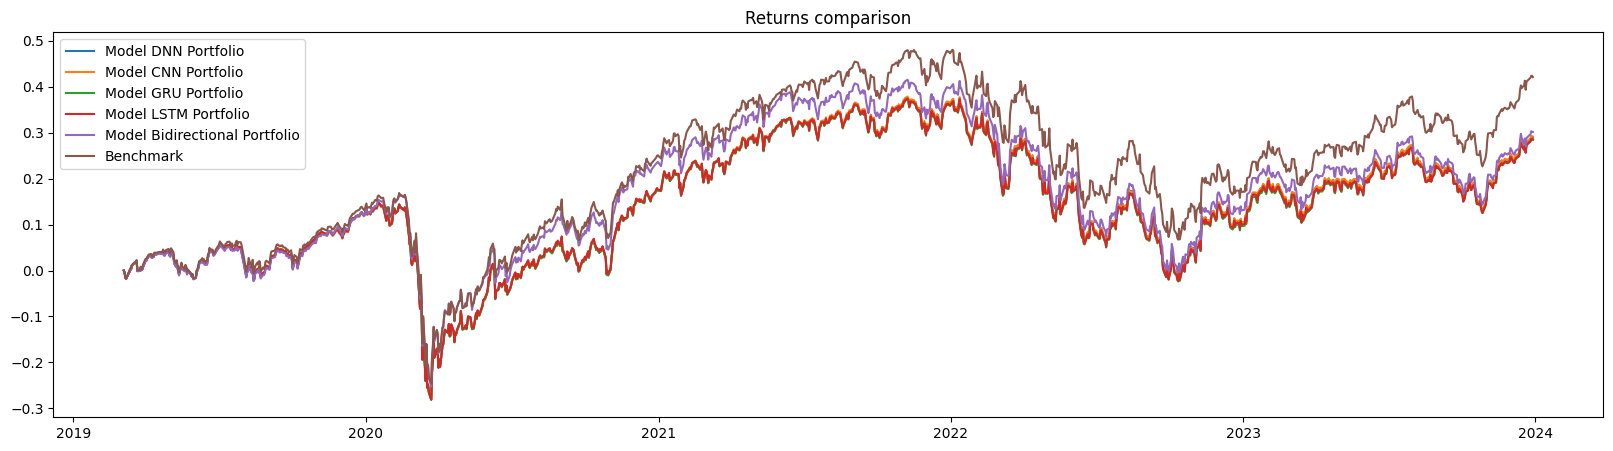

In [183]:
plt.figure(figsize=(20, 5))
plt.plot(cum_total_returns_model_dnn, label='Model DNN Portfolio')
plt.plot(cum_total_returns_model_cnn, label='Model CNN Portfolio')
plt.plot(cum_total_returns_model_gru, label='Model GRU Portfolio')
plt.plot(cum_total_returns_model_lstm, label='Model LSTM Portfolio')
plt.plot(cum_total_returns_model_bidirectional, label='Model Bidirectional Portfolio')
plt.plot(cum_benchmark_returns, label='Benchmark')
plt.legend()
plt.title('Returns comparison')
plt.show()

In [167]:
def daily_to_annual_returns(daily_returns):
    daily_returns.iloc[0] = 0
    tot_ret = (daily_returns + 1).prod() - 1
    
    init_date = daily_returns.index[0]
    end_date = daily_returns.index[-1]
    fyears = (end_date - init_date) / pd.Timedelta(days=365, hours=6)
    
    anual_ret = np.power(tot_ret + 1, 1/fyears) - 1
    return anual_ret

In [168]:
def calculate_metrics(df_returns, df_results, name):
    annual_returns = daily_to_annual_returns(df_returns)
    annual_volatility = df_returns.std()*np.sqrt(252)
    annual_sharpe = annual_returns/annual_volatility

    df_results.loc[name, :] = [annual_returns, annual_volatility, annual_sharpe]

In [181]:
df_results = pd.DataFrame(columns=['Annual Returns', 
                                   'Annual Volatility',
                                   'Annual Sharpe Ratio'])

calculate_metrics(benchmark_returns, df_results, 'Benchmark')
calculate_metrics(total_returns_model_dnn, df_results, 'Model DNN')
calculate_metrics(total_returns_model_cnn, df_results, 'Model CNN')
calculate_metrics(total_returns_model_gru, df_results, 'Model GRU')
calculate_metrics(total_returns_model_lstm, df_results, 'Model LSTM')
calculate_metrics(total_returns_model_bidirectional, df_results, 'Model Bidirectional')

df_results

,Annual Returns,Annual Volatility,Annual Sharpe Ratio
Benchmark,0.076754,0.203326,0.377494
Model DNN,0.054056,0.201332,0.26849
Model CNN,0.054481,0.201077,0.270947
Model GRU,0.053342,0.201409,0.264846
Model LSTM,0.053353,0.201278,0.265068
Model Bidirectional,0.056206,0.201007,0.27962
